<a href="https://colab.research.google.com/github/dardenkyle/titanic/blob/main/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook


## Setup and Imports

In [3]:
# Installing necessary packages to work with Kaggle API and download files
! pip install python-dotenv
! pip install -q kaggle

In [5]:
# Importing necessary libraries
import os
import zipfile
from dotenv import load_dotenv
from kaggle.api.kaggle_api_extended import KaggleApi

In [6]:
# General data science libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# ML Libraries
from xgboost import XGBClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              BaggingClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier,
                              )
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score,
                             recall_score,
                             precision_score,
                             f1_score,
                             make_scorer
                             )

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

# Magic commands
%matplotlib inline

## Kaggle Authentication and Data Download

In [13]:
# Loading environment variables from .env file
load_dotenv()

True

In [14]:
# Changing directory to proper directory
os.chdir('/content/drive/MyDrive/Kaggle/Notebooks')

In [15]:
# Ensuring that we are in the correct directory. ~/Kaggle/Notebooks
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: /content/drive/MyDrive/Kaggle/Notebooks


In [16]:
# Getting username/key from .env file
KAGGLE_USERNAME = os.getenv('KAGGLE_USERNAME')
KAGGLE_KEY = os.getenv('KAGGLE_KEY')

print('Successfully stored username and key variables.')

Successfully stored username and key variables.


In [17]:
# Used to test only, uncomment the following lines to determine username/key.

# print(f"Kaggle Username: {KAGGLE_USERNAME}")
# print(f"Kaggle Key: {KAGGLE_KEY}")

In [18]:
# Saving KaggleApi() as api
# Authenticating with api
api = KaggleApi()
api.authenticate()

print('Successfully authenticated with Kaggle API.')

Successfully authenticated with Kaggle API.


In [19]:
# Download Data
# ! kaggle competitions download -c 'name-of-competition'

# Use unzip command to unzip the data:

# For example,

# Create a directory named train,

# ! mkdir train

# unzip train data there,

# ! unzip train.zip -d train

In [20]:
 # List of active kaggle competitions
 api.competitions_list(page = 1)

[https://www.kaggle.com/competitions/arc-prize-2024,
 https://www.kaggle.com/competitions/lmsys-chatbot-arena,
 https://www.kaggle.com/competitions/isic-2024-challenge,
 https://www.kaggle.com/competitions/rsna-2024-lumbar-spine-degenerative-classification,
 https://www.kaggle.com/competitions/llm-20-questions,
 https://www.kaggle.com/competitions/uspto-explainable-ai,
 https://www.kaggle.com/competitions/playground-series-s4e7,
 https://www.kaggle.com/competitions/titanic,
 https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques,
 https://www.kaggle.com/competitions/spaceship-titanic,
 https://www.kaggle.com/competitions/digit-recognizer,
 https://www.kaggle.com/competitions/nlp-getting-started,
 https://www.kaggle.com/competitions/store-sales-time-series-forecasting,
 https://www.kaggle.com/competitions/connectx,
 https://www.kaggle.com/competitions/gan-getting-started,
 https://www.kaggle.com/competitions/tpu-getting-started,
 https://www.kaggle.com/competiti

In [21]:
# List of kaggle datasets
# api.datasets_list(page = 1)

In [22]:
# Storing data directory to data_dir
data_dir = '/content/drive/MyDrive/Kaggle/Data'

In [23]:
# Storing competition name as competition_name
# Edit with new competition name
competition_name = 'titanic'

In [24]:
# Click link to accept the rules
competition_rules = f'https://www.kaggle.com/c/{competition_name}/rules'
print(competition_rules)

https://www.kaggle.com/c/titanic/rules


In [25]:
# Download files for competition, must accept rules FIRST!
api.competition_download_files(competition_name, path=data_dir)

In [26]:
# Define the path to the downloaded zip file and the extraction directory
zip_file_path = f'/content/drive/MyDrive/Kaggle/Data/{competition_name}.zip'
extract_to_path = f'/content/drive/MyDrive/Kaggle/Data/{competition_name}'

# Create the extraction directory if it does not exist
os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Extracted dataset to: {extract_to_path}")

Extracted dataset to: /content/drive/MyDrive/Kaggle/Data/titanic


In [27]:
ls /content/drive/MyDrive/Kaggle/Data/{competition_name}

gender_submission.csv  test.csv  train.csv


In [32]:
data_dir = f'/content/drive/MyDrive/Kaggle/Data/{competition_name}'

In [33]:
data_dir

'/content/drive/MyDrive/Kaggle/Data/titanic'

## Data Loading/Overview

In [37]:
df = pd.read_csv(f'{data_dir}/train.csv')

In [38]:
test = pd.read_csv(f'{data_dir}/test.csv')

### Training Set

In [39]:
df.shape

(891, 12)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
print('There are', df.duplicated().sum(), 'duplicated rows.')

There are 0 duplicated rows.


In [44]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


* These values will be imputed with the most likely `Embarked` category for 1st class passengers.
* Since there are only 2 rows missing and they are in the same cabin, I will manually impute these
* Most 1st class passengers embarked from C so this is the value I will use for these 2 passengers

In [46]:
df.loc[61, 'Embarked'] = 'C'
df.loc[829, 'Embarked'] = 'C'

In [47]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [48]:
print('There are', df.isna().sum().sum(), 'missing values.')

There are 864 missing values.


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [50]:
df.describe(include=["object"]).T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,B96 B98,4
Embarked,891,3,S,644


In [51]:
df['Survived'].value_counts(1)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### Test Set

In [52]:
test.shape

(418, 11)

In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [56]:
print('There are', test.duplicated().sum(), 'duplicated rows.')

There are 0 duplicated rows.


In [57]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
print('There are', test.isna().sum().sum(), 'missing values.')

There are 414 missing values.


In [59]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [60]:
test.describe(include=["object"]).T

,count,unique,top,freq
Name,418,418,"Peter, Master. Michael J",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


## Data preproceesing

In [61]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [62]:
df[df['Cabin'].isnull() == True]['Pclass'].value_counts()

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

In [63]:
df.Cabin[df.Cabin == 'T'] = np.nan

In [64]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [65]:
df.Cabin = df.Cabin.str[0]
df.Cabin

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     203 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [67]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Sex',
    'Cabin',
    'Embarked'
    ]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     203 non-null    category
 8   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 45.1 KB


## Exploratory Data Analysis (EDA)

### Functions for EDA

In [69]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [70]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [71]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [72]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate

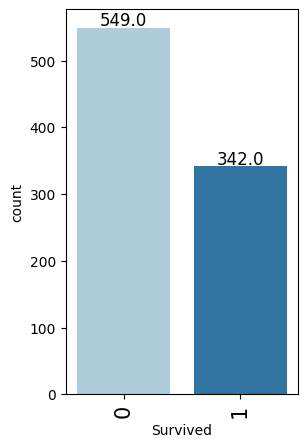

In [73]:
labeled_barplot(df, 'Survived')

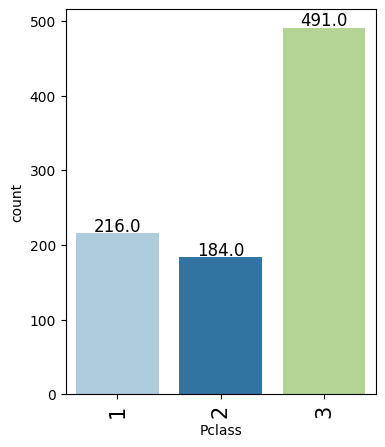

In [74]:
labeled_barplot(df, 'Pclass')

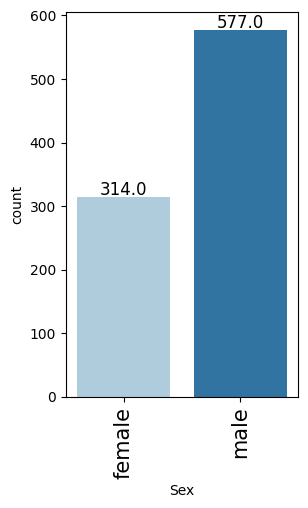

In [75]:
labeled_barplot(df, 'Sex')

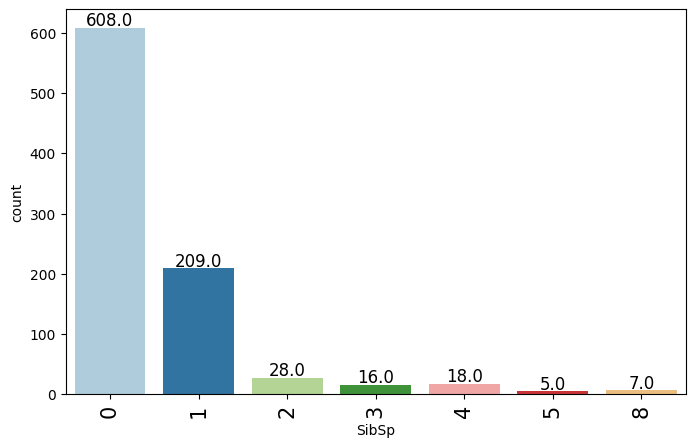

In [76]:
labeled_barplot(df, 'SibSp')

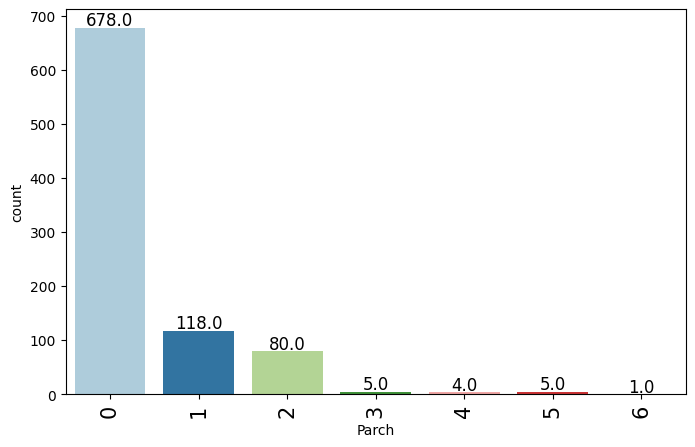

In [77]:
labeled_barplot(df, 'Parch')

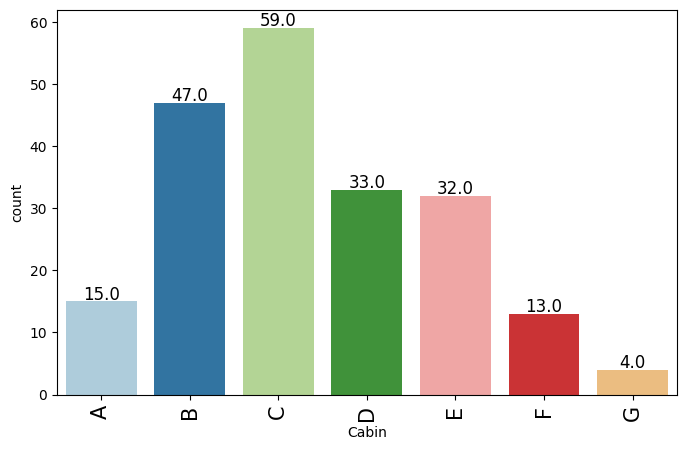

In [78]:
labeled_barplot(df, 'Cabin')

In [79]:
df['Cabin'].nunique()

7

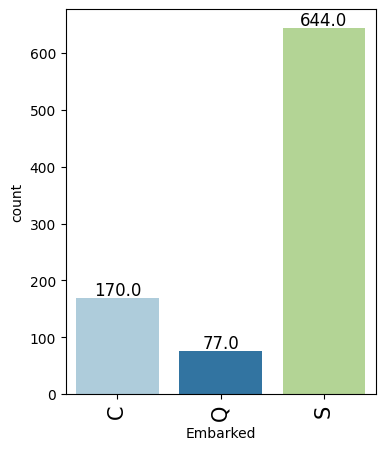

In [80]:
labeled_barplot(df, 'Embarked')

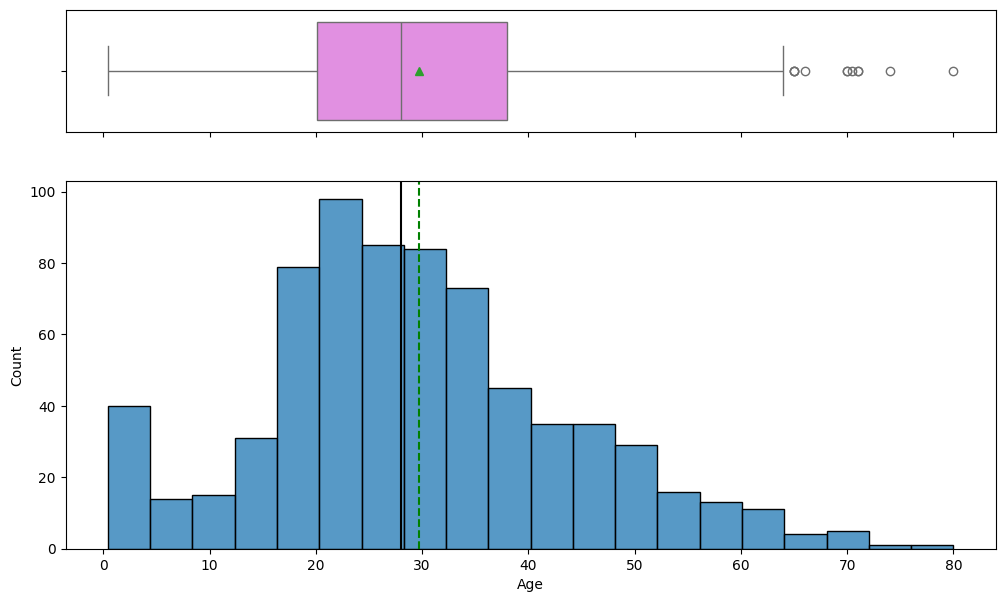

In [81]:
histogram_boxplot(df, 'Age')

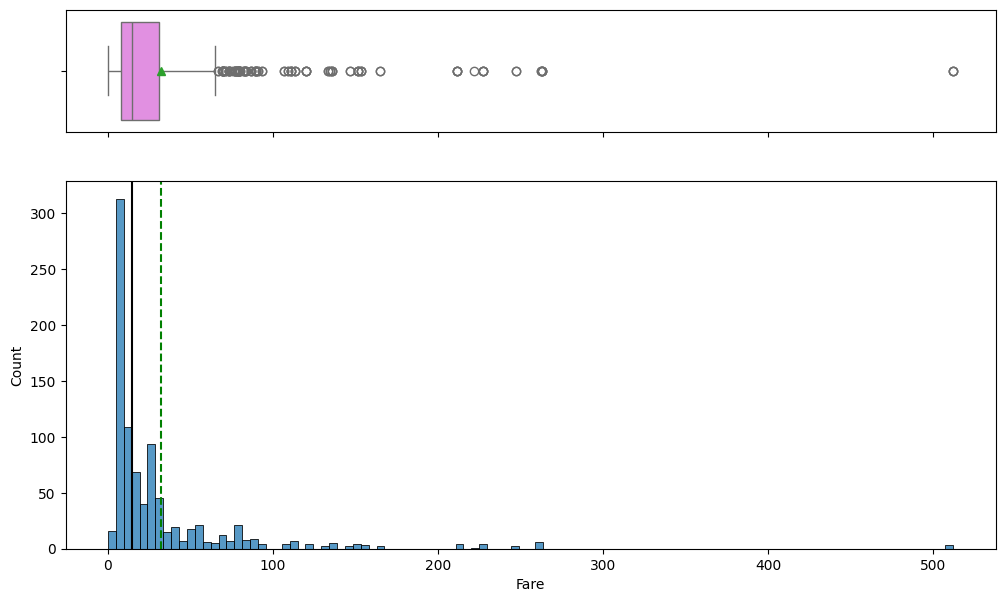

In [82]:
histogram_boxplot(df, 'Fare')

### Multivariate

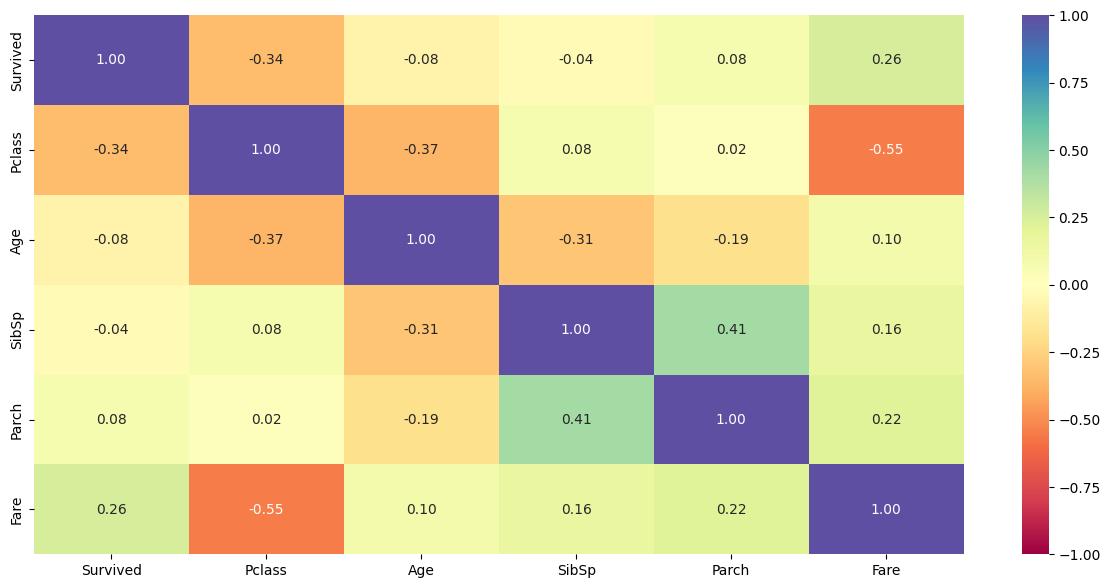

In [83]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     203 non-null    category
 8   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 45.1 KB


Embarked    C   Q    S  All
Pclass                     
All       170  77  644  891
3          66  72  353  491
2          17   3  164  184
1          87   2  127  216
------------------------------------------------------------------------------------------------------------------------


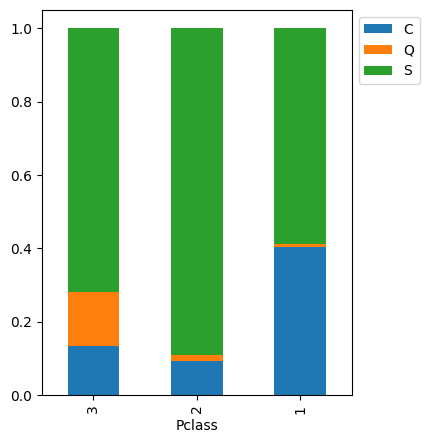

In [85]:
stacked_barplot(df, 'Pclass', 'Embarked')

Survived    0    1  All
Pclass                 
All       549  342  891
1          80  136  216
3         372  119  491
2          97   87  184
------------------------------------------------------------------------------------------------------------------------


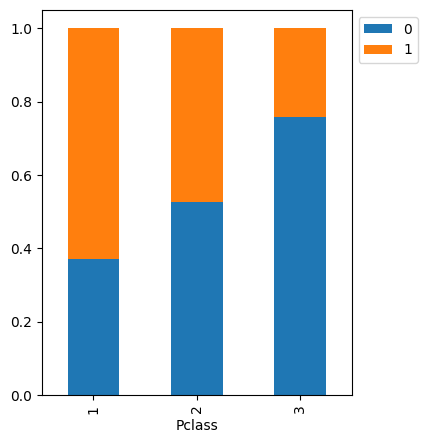

In [86]:
stacked_barplot(df, 'Pclass', 'Survived')

Survived    0    1  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
------------------------------------------------------------------------------------------------------------------------


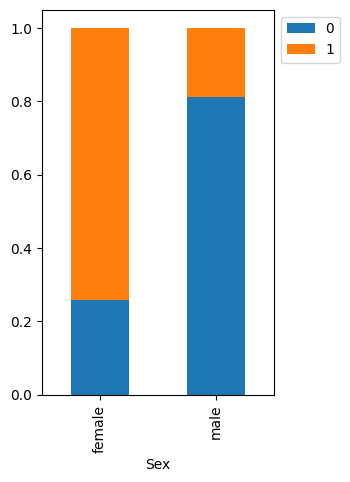

In [87]:
stacked_barplot(df, 'Sex', 'Survived')

Survived    0    1  All
Age                    
All       424  290  714
24.0       15   15   30
35.0        7   11   18
22.0       16   11   27
27.0        7   11   18
...       ...  ...  ...
10.0        2    0    2
57.0        2    0    2
59.0        2    0    2
61.0        3    0    3
64.0        2    0    2

[89 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


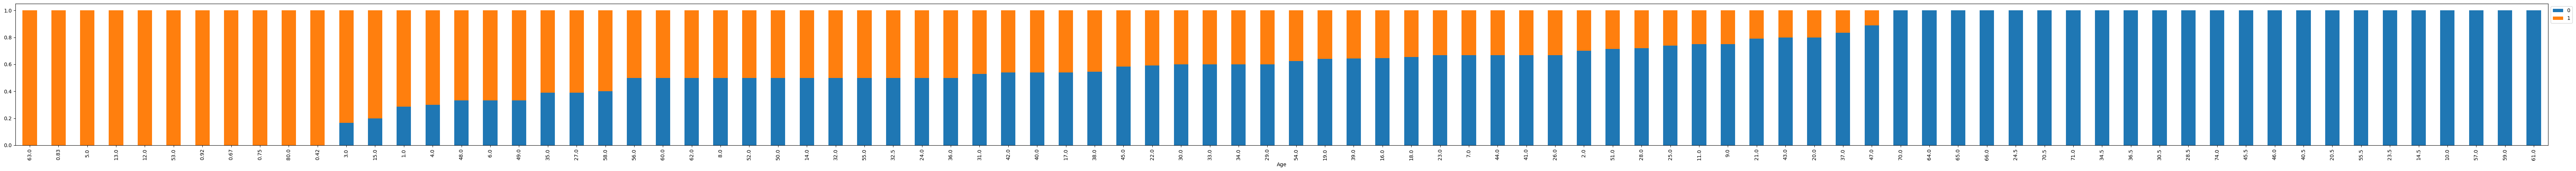

In [88]:
stacked_barplot(df, 'Age', 'Survived')

Survived    0    1  All
SibSp                  
All       549  342  891
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
------------------------------------------------------------------------------------------------------------------------


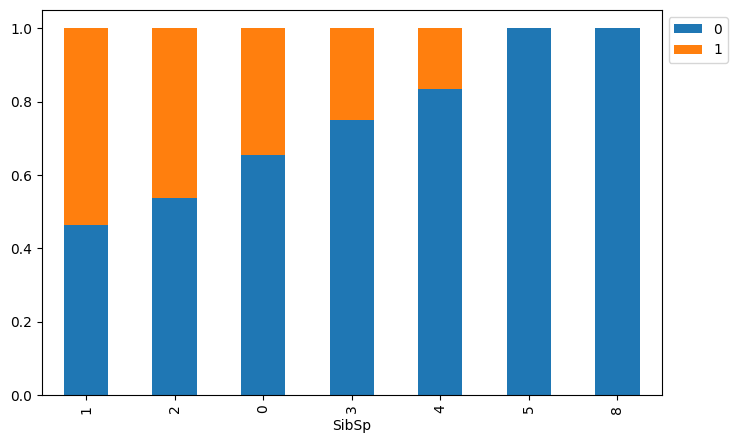

In [89]:
stacked_barplot(df, 'SibSp', 'Survived')

Survived    0    1  All
Parch                  
All       549  342  891
0         445  233  678
1          53   65  118
2          40   40   80
3           2    3    5
5           4    1    5
4           4    0    4
6           1    0    1
------------------------------------------------------------------------------------------------------------------------


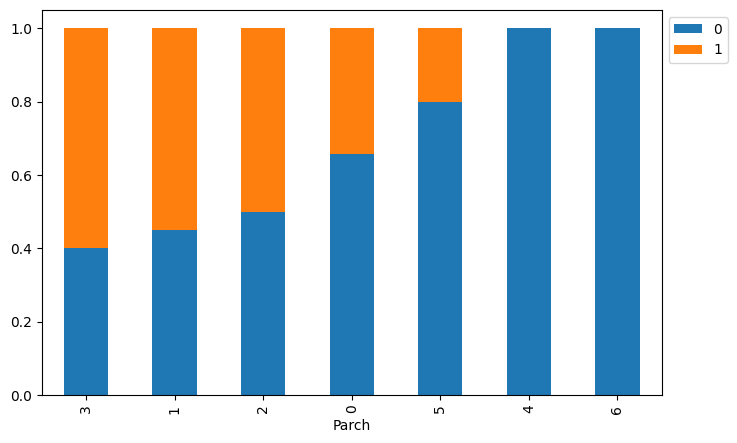

In [90]:
stacked_barplot(df, 'Parch', 'Survived')

Survived   0    1  All
Cabin                 
All       67  136  203
B         12   35   47
C         24   35   59
D          8   25   33
E          8   24   32
F          5    8   13
A          8    7   15
G          2    2    4
------------------------------------------------------------------------------------------------------------------------


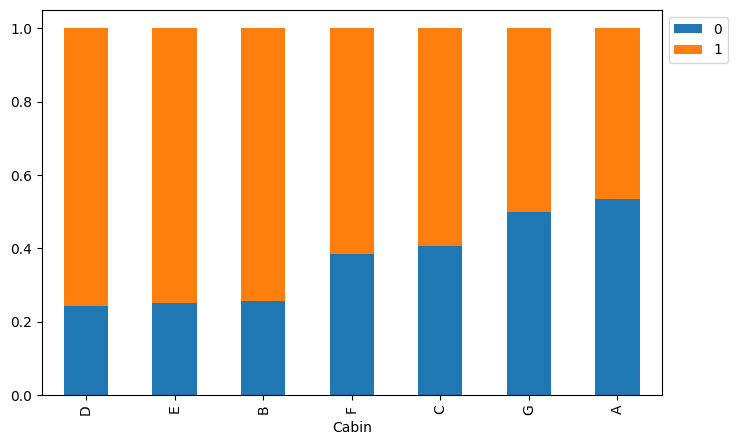

In [91]:
stacked_barplot(df, 'Cabin', 'Survived')

Survived    0    1  All
Embarked               
All       549  342  891
S         427  217  644
C          75   95  170
Q          47   30   77
------------------------------------------------------------------------------------------------------------------------


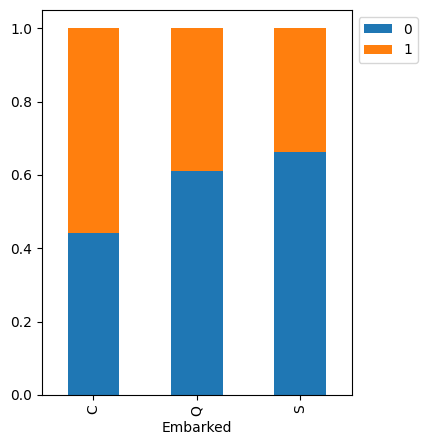

In [92]:
stacked_barplot(df, 'Embarked', 'Survived')

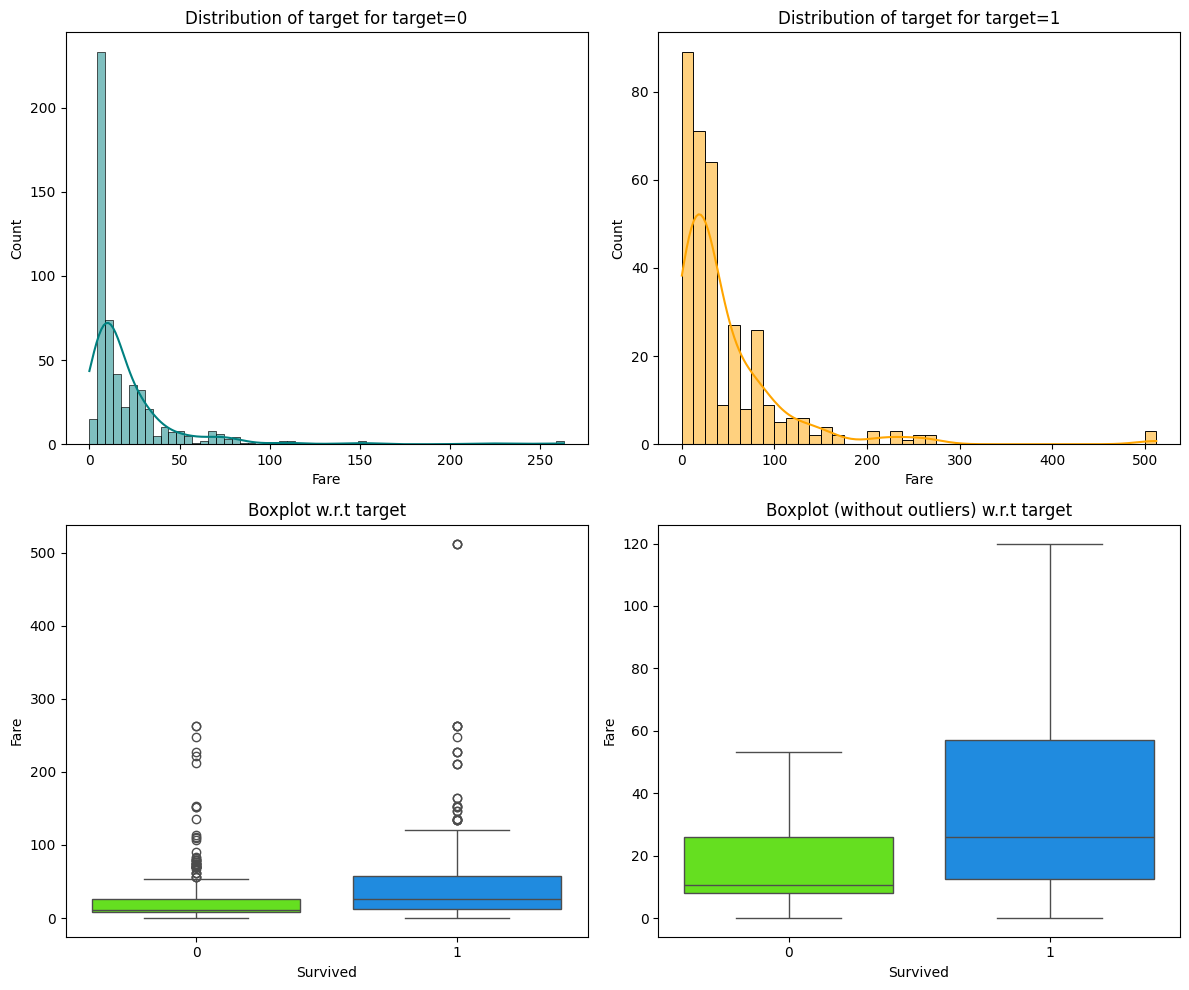

In [93]:
distribution_plot_wrt_target(df, "Fare", "Survived")

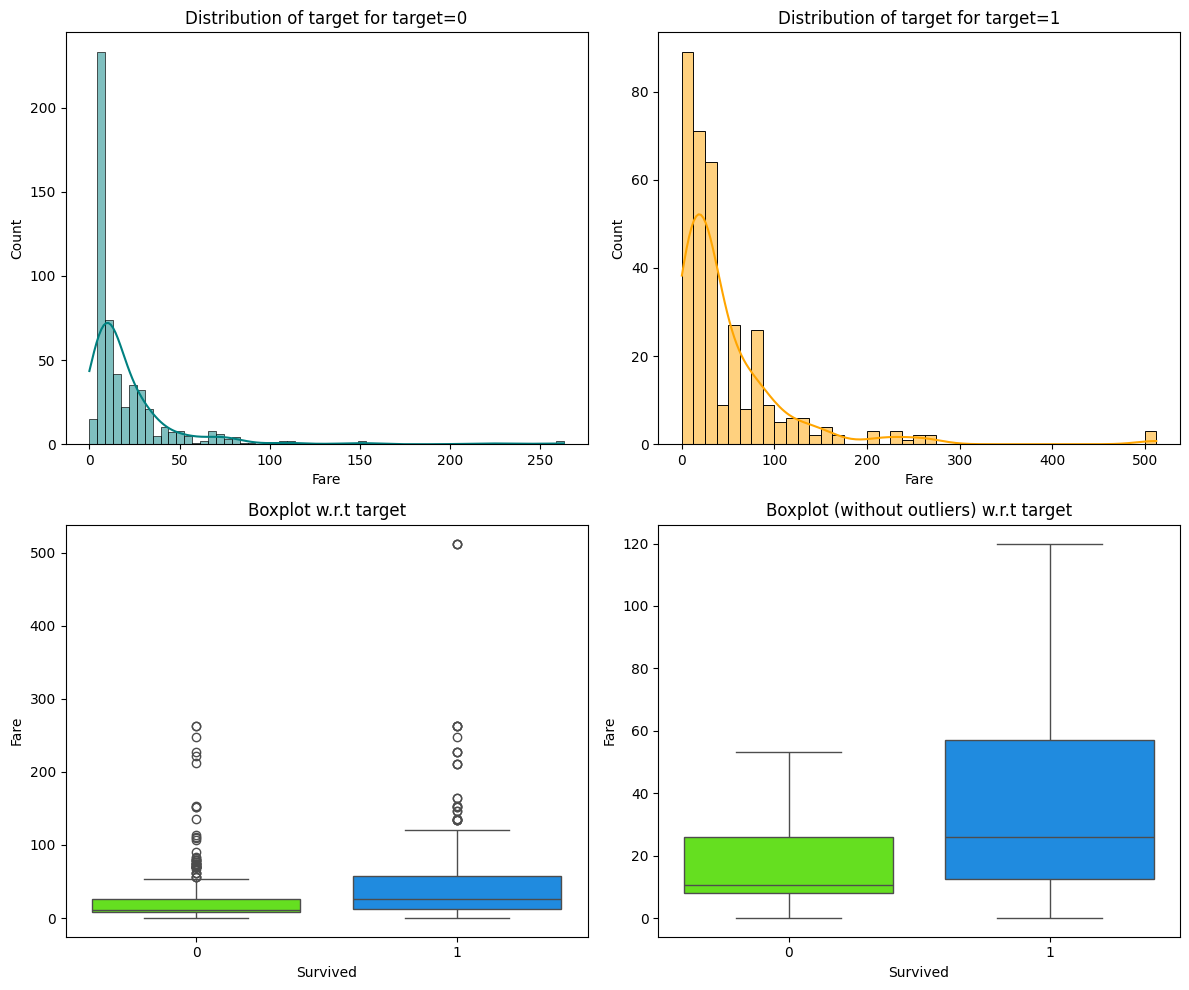

In [94]:
distribution_plot_wrt_target(df, "Fare", "Survived")

## Data Pre-processing

### Outlier Detection

In [95]:
# Code to be used checking for outliers.
Q1 = df.quantile(q=0.25, numeric_only=True)  # The 25th percentile.
Q3 = df.quantile(q=0.75, numeric_only=True)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [96]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Survived     0.000000
Pclass       0.000000
Age          1.234568
SibSp        5.162738
Parch       23.905724
Fare        13.019080
dtype: float64

### Missing Value Imputation


In [97]:
print('There are', df.isna().sum().sum(), "missing values.")

There are 865 missing values.


In [98]:
# Creating an imputer to impute values by the mode.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Creating an imputer to impute na values to 'Unknown'
imp_unknown = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')

In [99]:
# Creating list of column labels that need to be imputed.
col_impute = ['Age']
col_impute_unknown = ['Cabin']

In [100]:
df[col_impute] = imp_mean.fit_transform(df[col_impute])

In [101]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       688
Embarked      0
dtype: int64

In [102]:
df[col_impute_unknown] = imp_unknown.fit_transform(df[col_impute_unknown])

In [103]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### OneHotEncoding


In [104]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [105]:
one_hot_encoded = encoder.fit_transform(df[cat_cols])

In [106]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_cols))

In [107]:
df_encoded = pd.concat([df, one_hot_df], axis=1)

In [108]:
df_encoded = df_encoded.drop(cat_cols, axis=1)

### Train-test split

In [109]:
# Creating the independent variable data frame.
X = df_encoded.drop('Survived', axis=1)
# Creating the dependent variable data frame.
y = df_encoded['Survived']

print('Data has been split into independent and dependent variables')

Data has been split into independent and dependent variables


In [110]:
X.shape

(891, 15)

In [111]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [112]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp)

In [113]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (712, 15)
Shape of Validation Set (125, 15)
Shape of Test Set :  (54, 15)
****************************************
Percentage of classes in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Survived
0    0.611111
1    0.388889
Name: proportion, dtype: float64
****************************************


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True Positives (TP) are existing customers correctly predicted by the model.
- True Negatives (TN) are atritioned customers correctly predicted by the model.
- False Positives (FP) are atritioned customers incorrectly predicted as an existing customer by the model.
- False Negatives (FN) are existing customers incorrectly predicted as an atritioned customer by the model.



**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of customer attritions are predicted correctly by the model.
* We would want Precision to be maximized as greater the Precision, the higher the chances of minimizing False Positives.
* We want to minimize False Positives because if a model predicts that a customer will not attrit, but they do, the customer is lost.

In [114]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn.
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # To compute Accuracy.
    recall = recall_score(target, pred)  # To compute Recall.
    precision = precision_score(target, pred)  # To compute Precision.
    f1 = f1_score(target, pred)  # To compute F1-score.

    # Creating a dataframe of metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [115]:
# Defining a function to create a confusion matrix to check TP, FP, TN, adn FN values.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables.
    y_pred = model.predict(predictors)
    # Creating the confusion matrix.
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix.
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [116]:
models = []  # Empty list to store all the models.

# Appending models into the list.
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9662921348314606
Random forest: 0.9833641404805914
AdaBoost: 0.7912087912087912
GradientBoost: 0.8699029126213592
XGBoost: 0.9664179104477612

Validation Performance:

Bagging: 0.7692307692307692
Random forest: 0.7741935483870969
AdaBoost: 0.6595744680851064
GradientBoost: 0.7692307692307692
XGBoost: 0.7755102040816326


### Model Building with Oversampled data


In [117]:
# Synthetic Minority Over Sampling Technique.
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

* Oversampled the training data to fit next models with.

In [118]:
models_over = []  # Empty list to store all the models.

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = precision_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9953161592505855
Random forest: 0.9931192660550459
AdaBoost: 0.8594104308390023
GradientBoost: 0.9294403892944039
XGBoost: 0.9906759906759907

Validation Performance:

Bagging: 0.7647058823529411
Random forest: 0.7659574468085106
AdaBoost: 0.6739130434782609
GradientBoost: 0.723404255319149
XGBoost: 0.7450980392156863


### Model Building with Undersampled data

In [119]:
# Random undersampler for under sampling the data.
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

* Undersampled the training data to fit the next models with.

In [120]:
models_un = []  # Empty list to store all the models.

# Appending models into the list.
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_un.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_un.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = precision_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9923954372623575
Random forest: 0.9926470588235294
AdaBoost: 0.8333333333333334
GradientBoost: 0.9069767441860465
XGBoost: 0.9816176470588235

Validation Performance:

Bagging: 0.7058823529411765
Random forest: 0.6666666666666666
AdaBoost: 0.6530612244897959
GradientBoost: 0.7058823529411765
XGBoost: 0.639344262295082


### XGBoost Tuning (original training data)

In [121]:
# Defining the model.
XGB_org = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05,0.2,0.5],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(f1_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 75, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.7674523045386021:


In [122]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_org_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.05,
    gamma=1)

# Fitting the model to the original training data.
XGB_org_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [123]:
 # Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.898876,0.813187,0.91358,0.860465


In [124]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_train_scores = model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

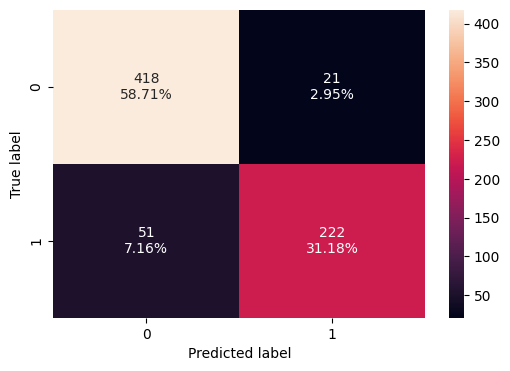

In [125]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(XGB_org_tuned, X_train, y_train)

In [126]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.816,0.729167,0.777778,0.752688


In [127]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_val_scores = model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

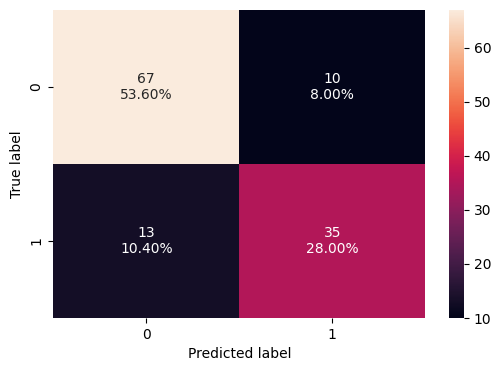

In [128]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_org_tuned, X_val, y_val)

In [129]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_org_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.851852,0.714286,0.882353,0.789474


### Random Forest Tuning

In [130]:
# Defining the model.
RF = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Defining the scorer.
scorer = make_scorer(f1_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train, y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.7600807975867119:


In [131]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
RF_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=50,
    min_samples_leaf=2,
    max_samples=0.4,
    max_features='sqrt')

# Fitting the tuned model to the undersampled traning data.
RF_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=2, n_estimators=50,
                       random_state=1)

In [132]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(RF_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.884831,0.78022,0.906383,0.838583


In [133]:
# Saving the tuned model's scores for later comparison.
RF_tuned_train_scores = model_performance_classification_sklearn(RF_tuned, X_train, y_train)

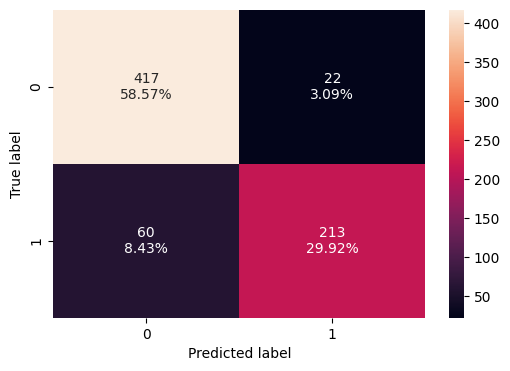

In [134]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(RF_tuned, X_train, y_train)

In [135]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(RF_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.832,0.708333,0.829268,0.764045


In [136]:
# Saving the tuned model's scores for later comparison.
RF_tuned_val_scores = model_performance_classification_sklearn(RF_tuned, X_val, y_val)

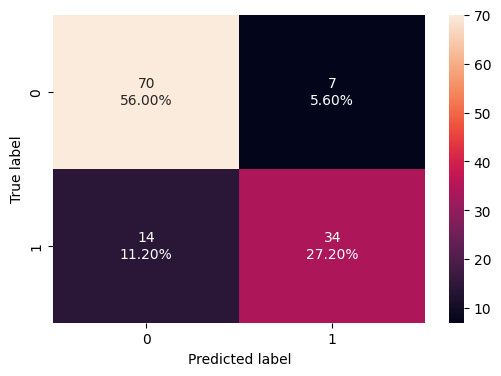

In [137]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(RF_tuned, X_val, y_val)

In [138]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(RF_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.833333,0.761905,0.8,0.780488


## Model Building (Deep Learning)

### Model Building: Neural Network model with Adam Optimizer

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
from sklearn.metrics import roc_curve

In [140]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [141]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
keras.backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [142]:
# Creating a sequential model.
model1 = Sequential()
# Adding the hidden and output layers.
model1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [143]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer1 = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer1,metrics=['accuracy'])

In [144]:
# Checking the summary of the model.
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [145]:
# Fitting the model to training data and storing the results.
history1 = model1.fit(X_train,
                      y_train,
                      batch_size=64,
                      epochs=50,
                      verbose=1,
                      validation_data=(X_val, y_val))
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/50
12/12 [==============================] - 3s 26ms/step - loss: 0.7733 - accuracy: 0.5871 - val_loss: 0.6524 - val_accuracy: 0.6960
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.6952 - val_loss: 0.6207 - val_accuracy: 0.6480
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6127 - accuracy: 0.6770 - val_loss: 0.6245 - val_accuracy: 0.6800
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6122 - accuracy: 0.6924 - val_loss: 0.5920 - val_accuracy: 0.6800
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5870 - accuracy: 0.7177 - val_loss: 0.6035 - val_accuracy: 0.6560
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5886 - accuracy: 0.6826 - val_loss: 0.5750 - val_accuracy: 0.6800
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5589 - accuracy: 0.6966 - val_loss: 0.5667 - val_accuracy: 0.6880
Epoch 8/50
12/12 [=

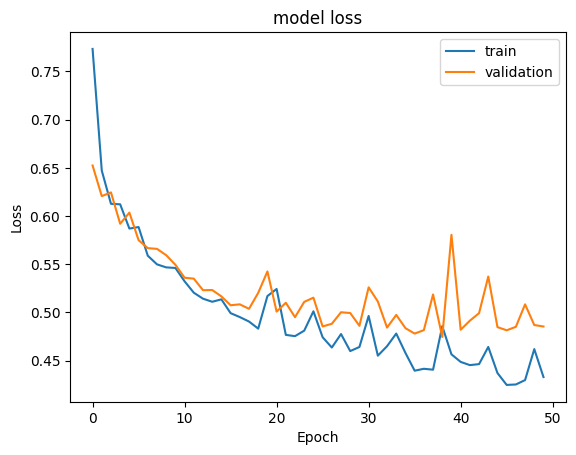

2/2 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.8333


In [146]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Printing results.
results = model1.evaluate(X_test, y_test)

23/23 [==============================] - 0s 1ms/step
Best Threshold=0.439805, G-Mean=0.824


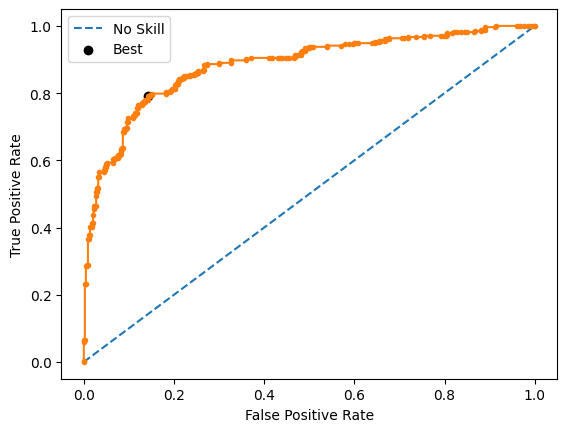

In [147]:
# Predicting probabilities.
yhat1 = model1.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat1 = yhat1[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds1 = roc_curve(y_train, yhat1)
# Calculating the g-mean for each threshold.
gmeans1 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [148]:
# Predicting the results using best as a threshold.
y_pred1 = model1.predict(X_val)
y_pred1 = (y_pred1 > thresholds1[ix])
y_pred1

4/4 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [

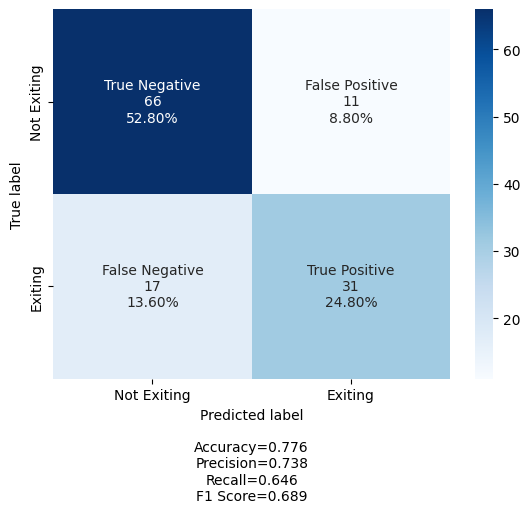

In [149]:
# Calculating the confusion matrix.
cm1 = confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [150]:
# Accuracy as per the classification report.
cr1 = sklearn.metrics.classification_report(y_val,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.74      0.65      0.69        48

    accuracy                           0.78       125
   macro avg       0.77      0.75      0.76       125
weighted avg       0.77      0.78      0.77       125



## Predicting on Unlabeled Test Data


### Test data preparation

In [153]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [154]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [155]:
PassengerId = test['PassengerId']

In [156]:
test = test.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [157]:
test.Cabin = test.Cabin.str[0]
test.Cabin

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

In [158]:
test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [159]:
test[cat_cols] = test[cat_cols].astype('category')

In [160]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    category
 2   Age       332 non-null    float64 
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      417 non-null    float64 
 6   Cabin     91 non-null     category
 7   Embarked  418 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 18.3 KB


In [162]:
test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### Missing Value Imputation


In [163]:
print('There are', test.isna().sum().sum(), "missing values.")

There are 414 missing values.


In [164]:
# Creating an imputer to impute values by the mode.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Creating an imputer to impute na values to 'Unknown'
imp_unknown = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')

In [165]:
# Creating list of column labels that need to be imputed.
col_impute = ['Age', 'Fare']
col_impute_unknown = ['Cabin']

In [166]:
test[col_impute] = imp_mean.fit_transform(test[col_impute])

In [167]:
test.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [168]:
test[col_impute_unknown] = imp_unknown.fit_transform(test[col_impute_unknown])

In [169]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### OneHotEncoding


In [170]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [171]:
one_hot_encoded_test = encoder.fit_transform(test[cat_cols])

In [172]:
one_hot_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(cat_cols))

In [173]:
test_encoded = pd.concat([test, one_hot_test], axis=1)

In [174]:
cat_cols_to_drop = [col for col in cat_cols if col not in XGB_org_tuned.feature_names_in_]
test_encoded = test_encoded.drop(cat_cols_to_drop, axis=1)

In [175]:
test_encoded.shape

(418, 15)

### Prediction - Ensemble Learning


In [176]:
predict = XGB_org_tuned.predict(test_encoded)

In [177]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predict})
output.to_csv('titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Predict on Unlabeled Test set with ANN w/ adam optimizer

In [179]:
ANN_predict = model1.predict(test_encoded)
ANN_predict = (ANN_predict > thresholds1[ix])
ANN_predict

14/14 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [180]:
ANN_predict = ANN_predict.flatten()

In [181]:
ANN_predict = ANN_predict.astype(int)

In [182]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': ANN_predict})
output.to_csv('titanic_submission_ann.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
